# Clustering on Fashion MNIST Dataset

# K-Means Clustering Implementation

In [1]:
#Importing the required packages
import sklearn
from sklearn.cluster import MiniBatchKMeans
import sys
import tensorflow as tf
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, normalized_mutual_info_score
from keras.datasets import mnist

#Loading the fashion mnist dataset
(x_train, y_train),(x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

#Reshaping and normalizing the data
x=np.concatenate((x_train, x_test))
y=np.concatenate((y_train, y_test))
x=x_train.reshape((x_train.shape[0],-1))
x=np.divide(x.astype(float),255)

# Initialize KMeans model
kmeans = KMeans(n_clusters = 10)

# Fit the kmeans model on to the training data
kmeans.fit(x)

# Associates most probable label with each cluster in KMeans model
def infer_cluster_labels(kmeans, actual_labels):

    inferred_labels = {}
    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

#Determines the label for each array,depending on the cluster it has been assigned to
def infer_data_labels(X_labels, cluster_labels):
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

# test the infer_cluster_labels() and infer_data_labels() functions
n_clusters_count=10
cluster_labels = infer_cluster_labels(kmeans, y_train)
X_clusters = kmeans.predict(x)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
from sklearn import metrics
    
print("Number of clusters:",n_clusters_count)

estimator = MiniBatchKMeans(n_clusters = n_clusters_count)
estimator.fit(x)
    
# finding the predicted data
cluster_labels_value = infer_cluster_labels(estimator, y_train)
predicted_value = infer_data_labels(estimator.labels_, cluster_labels_value)
    
# calculating and print accuracy
print('KMeans Accuracy: {} %\n'.format(metrics.accuracy_score(y_train, predicted_value)*100))
    
#calculate confusion matrix
print("Confusion Matrix is:")
print("\n")
confusion_matrix_data=confusion_matrix(predicted_value,y_train)
print(confusion_matrix_data)
print("\n")

Using TensorFlow backend.


Number of clusters: 10
KMeans Accuracy: 54.190000000000005 %

Confusion Matrix is:


[[3252    1   42   87    6    0  761    0    7    0]
 [   5 5178    1   32   10    0    4    0    2    0]
 [  79   66 3444   39 3414    0 1880    0   66    6]
 [ 489  239   12 3687  177    8  204    0  135   10]
 [ 342  216  294 1145 1346    0  465    0  156    7]
 [   0    0    0    0    0    0    0    0    0    0]
 [1699  293 1800  998  912 1472 2321    9 1224  156]
 [   5    0    2    0    0 3593    9 4642  219   98]
 [ 121    7  400   11  133    2  343    0 2922    1]
 [   8    0    5    1    2  925   13 1349 1269 5722]]




# Auto-Encoder based K-Means clustering

In [2]:
from sklearn.model_selection import train_test_split

#Reshaping and normalizing the data
x_train=x_train.reshape(-1,28,28,1)/255
x_test=x_test.reshape(-1,28,28,1)/255

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=123)

In [3]:
# Build the autoencoder
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, UpSampling2D, Activation
from keras import backend as K
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
# import seaborn as sns
model = Sequential()
model.add(Conv2D(14, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(7, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(7, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(14, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(1, kernel_size=3, padding='same', activation='relu'))

model.compile(optimizer='sgd', loss="mse")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 14)        140       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 14)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 14)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 7)         889       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 7)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 7)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 7)          

In [4]:
# Train the model
epochs_final=10
data=model.fit(x_train, x_train, epochs=epochs_final, batch_size=256, validation_data=(x_validate, x_validate), verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 72s 1ms/step - loss: 0.0824 - val_loss: 0.0627
Epoch 2/10
48000/48000 [==============================] - 73s 2ms/step - loss: 0.0642 - val_loss: 0.0609
Epoch 3/10
48000/48000 [==============================] - 71s 1ms/step - loss: 0.0597 - val_loss: 0.0602
Epoch 4/10
48000/48000 [==============================] - 77s 2ms/step - loss: 0.0571 - val_loss: 0.0589
Epoch 5/10
48000/48000 [==============================] - 79s 2ms/step - loss: 0.0551 - val_loss: 0.0577
Epoch 6/10
48000/48000 [==============================] - 79s 2ms/step - loss: 0.0535 - val_loss: 0.0565
Epoch 7/10
48000/48000 [==============================] - 72s 2ms/step - loss: 0.0519 - val_loss: 0.0551
Epoch 8/10
48000/48000 [==============================] - 72s 1ms/step - loss: 0.0506 - val_loss: 0.0534
Epoch 9/10
48000/48000 [==============================] - 72s 1ms/step - loss: 0.0495 - val_loss: 0.0524
Epoch

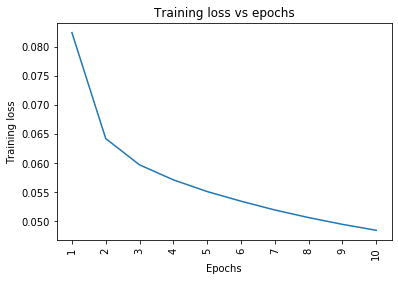

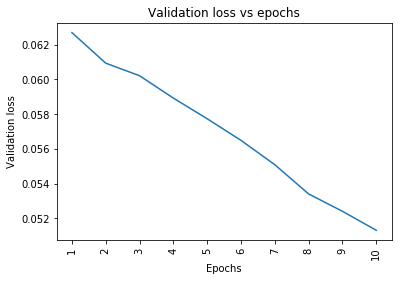

In [5]:
#Plotting the graph for training loss versus epochs
epoch=range(1,epochs_final+1)
plt.plot(epoch,data.history['loss'])
plt.xticks(epoch, rotation ='vertical')
plt.title('Training loss vs epochs')
plt.ylabel('Training loss')
plt.xlabel('Epochs')
plt.show()

#Plotting the graph for validation loss versus epochs
plt.plot(epoch,data.history['val_loss'])
plt.xticks(epoch, rotation ='vertical')
plt.title('Validation loss vs epochs')
plt.ylabel('Validation loss')
plt.xlabel('Epochs')
plt.show()

In [6]:
# Extract the encoder
encoder = K.function([model.layers[0].input], [model.layers[4].output])

# Encode the training set
encoded_images = encoder([x_test])[0].reshape(-1,7*7*7)
#encoded_images.shape

In [7]:
# Cluster the training set
kmeans_afterencoder = KMeans(n_clusters=10)
clustered_training_set = kmeans_afterencoder.fit_predict(encoded_images)

# Calculating Confusion Matrix
print("Confusion Matrix is:")
print("\n")
matrix_data = confusion_matrix(y_test, clustered_training_set)
print(matrix_data)
print("\n")

estimator_encoder = KMeans(n_clusters=10)
estimator_encoder.fit(encoded_images)

# determining predicted values
cluster_labels_AE_value = infer_cluster_labels(estimator_encoder, y_test)
predicted_Y_AE_value = infer_data_labels(estimator_encoder.labels_, cluster_labels_AE_value)

# calculate and print accuracy
print('AutoEncoder based k-means clustering accuracy is: {} %\n'.format(metrics.accuracy_score(y_test, predicted_Y_AE_value)*100))

Confusion Matrix is:


[[488   4   1   3   1 186 135  47  27 108]
 [  0   0   0   1   0  15  46   9 842  87]
 [  3   6   0   5   0 324  85 541   4  32]
 [  8   4   0   0   0  57 101  14 448 368]
 [  0   4   0   3   0 136  53 603  17 184]
 [  0   1 124   5 308   6 556   0   0   0]
 [ 87   1   0  12   0 295 156 318  18 113]
 [  0   0  43   4 881   0  72   0   0   0]
 [  1 404   1 359  62  30  71  64   5   3]
 [  0   1 829   4 134   3  24   3   0   2]]


AutoEncoder based k-means clustering accuracy is: 56.39999999999999 %



# Auto-Encoder based Gaussian Mixture Model Clustering

In [8]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=10)
data1=gmm.fit(encoded_images)

labels_GMM=gmm.fit_predict(encoded_images)

In [9]:
#Associates most probable label with each cluster in KMeans model
def infer_cluster_labels_GMM(gmm, actual_labels):
    inferred_labels = {}

    for i in range(gmm.n_components):

        # find index of points in cluster
        labels = []
        index = np.where(labels_GMM == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

# Determines label for each array, depending on the cluster it has been assigned to.
def infer_data_labels_GMM(X_labels, cluster_labels):
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels


In [10]:
cluster_labels_GMM_value = infer_cluster_labels_GMM(gmm, y_test)
predicted_Y_GMM_value = infer_data_labels_GMM(labels_GMM, cluster_labels_GMM_value)

#Calculating accuracy
print('Gaussian Mixture Model Accuracy is: {} %\n'.format(metrics.accuracy_score(y_test, predicted_Y_GMM_value) *100))

#Confusion matrix calculation
print("Confusion Matrix is:")
print("\n")
matrix_gmm = confusion_matrix(y_test, labels_GMM)
print(matrix_gmm)

Gaussian Mixture Model Accuracy is: 55.96 %

Confusion Matrix is:


[[ 21  40   1  28   1  68 142 602  90   7]
 [  8   5   0   4   0 924   9   1  48   1]
 [431  44   0 239   0   5 250   7  16   8]
 [ 24  18   0   5   0 509  55   8 381   0]
 [601  32   0 141   0  14  83   0 123   6]
 [  0 244 600   0 146   0   7   0   0   3]
 [299  53   0 109   0  36 253 127 114   9]
 [  0   0 968   0  32   0   0   0   0   0]
 [  9  40  77  78   1  14 146   1   7 627]
 [  1   5 230   2 757   0   2   0   2   1]]
